## Vector CNN Model
Like the Multi-Headed Output, this model predicts multiple classes of points and outputs them as a single vector, with each pair of numbers representing individual coordinates for a specific class. This correpsonds to the order of the classes of points given for the loss function, which is in ascending order, so the first pair of numbers in the output vector are of class 1, the second to class 2, and so on. 

## Imports and Prep

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install torch
!pip3 install torchvision
!pip3 install tqdm

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms, utils, datasets
from tqdm import tqdm
from torch.nn.parameter import Parameter
import pdb
import os
import pandas as pd
from skimage import io, transform
import matplotlib.pyplot as plt
import PIL.Image as Image
from sklearn.model_selection import train_test_split

## Dataset Class

In [ ]:
class ProjPointsDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file_id, csv_file, root_dir, transform=None):
        """
        Arguments:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        #self.landmarks_frame = pd.read_csv(csv_file)
        #self.landmarks_frame = csv_file
        self.landmarks_id = csv_file_id
        #self.landmarks_id = self.landmarks_id_df['id']
        self.root_dir = root_dir
        self.transform = transform
        self.landmarks_df = pd.read_csv(csv_file)
        #self.database = []
        #for i in range(len(landmarks_id)):


        #self.database.append(sample)


    def __len__(self):
        return len(self.landmarks_id)

    def __getitem__(self, idx):
      if torch.is_tensor(idx):
        idx = idx.tolist()
      #print(type(self.landmarks_id))
      img_name = os.path.join(self.root_dir, self.landmarks_id.iloc[idx,0])
      img_name = img_name + '.png'
      image = io.imread(img_name)
      landmarks = self.landmarks_df[self.landmarks_df['id'] == self.landmarks_id.iloc[idx,0]][['x', 'y']].values
      landmarks[:,1] = 1000 - landmarks[:,1]
      landmarks = np.array([landmarks], dtype=float).reshape(-1, 2)
      sample = {'image': image, 'landmarks': landmarks}


      if self.transform:
        sample = self.transform(sample)

      return sample

In [ ]:
landmarks_id_dir = '/content/drive/MyDrive/side-notchedLandmarks-only_class1.csv'
landmarks_id_df = pd.read_csv(landmarks_id_dir)
#landmarks_id = landmarks_id_df['id']

In [ ]:
image_directory = '/content/drive/MyDrive/landmarkTraining'
landmarks_dir = '/content/drive/MyDrive/side-notchedLandmarks_1&2.csv'

In [ ]:
pp_db = ProjPointsDataset(landmarks_id_df, landmarks_dir, image_directory)

In [ ]:
pp_db[0]

{'image': array([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]], dtype=uint8),
 'landmarks': array([[706., 493.]

In [ ]:
# landmarks_df = pd.read_csv(landmarks_dir)
# PP_database = []
# for i in range(0,10):
#   img_name = os.path.join(image_directory,landmarks_id[i])
#   img_name = img_name + '.png'
#   image = io.imread(img_name)
#   landmarks = landmarks_df[landmarks_df['id'] == landmarks_id[i]][['x', 'y']].values
#   landmarks[:,1] = 1000 - landmarks[:,1]
#   landmarks = np.array([landmarks], dtype=float).reshape(-1, 2)
#   sample = {'image': image, 'landmarks': landmarks}
#   PP_database.append(sample)

In [ ]:
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    print("Image type: ", type(image))
    plt.imshow(image)

    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated

0 (1000, 1000, 4) (2, 2)
Image type:  <class 'numpy.ndarray'>


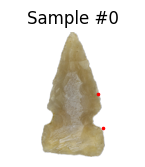

1 (1000, 1000, 4) (2, 2)
Image type:  <class 'numpy.ndarray'>


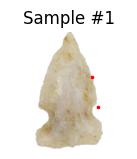

2 (1000, 1000, 4) (2, 2)
Image type:  <class 'numpy.ndarray'>


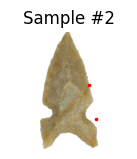

3 (1000, 1000, 4) (2, 2)
Image type:  <class 'numpy.ndarray'>


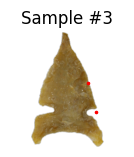

In [ ]:
fig = plt.figure()

for i, sample in enumerate(pp_db):
    print(i, sample['image'].shape, sample['landmarks'].shape)
    #print(i, sample['image'].size, sample['landmarks'].shape)
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break

In [ ]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h + 1)
        left = np.random.randint(0, w - new_w + 1)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W

        image = image.transpose((2, 0, 1))
        ### Grab only first 3 input channels of image, as fourth channel is a "transparency" channel
        #print("Image shape: ", image[0:3].shape)
        return {'image': torch.from_numpy(image[0:3]),
                'landmarks': torch.from_numpy(landmarks)}

In [ ]:
transformed_dataset = ProjPointsDataset(csv_file_id=landmarks_id_dir, csv_file=landmarks_dir,
                                           root_dir=image_directory,
                                           transform=transforms.Compose([
                                               Rescale(256),
                                               RandomCrop(224),
                                               ToTensor()
                                           ]))

for i, sample in enumerate(transformed_dataset):
    print(i, sample['image'].size(), sample['landmarks'].size())

    if i == 3:
        break

0 torch.Size([3, 224, 224]) torch.Size([2, 2])
1 torch.Size([3, 224, 224]) torch.Size([2, 2])
2 torch.Size([3, 224, 224]) torch.Size([2, 2])
3 torch.Size([3, 224, 224]) torch.Size([2, 2])


0 torch.Size([4, 3, 224, 224]) torch.Size([4, 2, 2])
1 torch.Size([4, 3, 224, 224]) torch.Size([4, 2, 2])
2 torch.Size([4, 3, 224, 224]) torch.Size([4, 2, 2])
3 torch.Size([4, 3, 224, 224]) torch.Size([4, 2, 2])


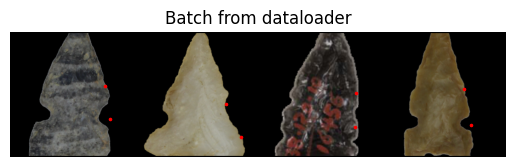

In [ ]:
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=0)


# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
            sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    grid_border_size = 2

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    for i in range(batch_size):
        plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size + (i + 1) * grid_border_size,
                    landmarks_batch[i, :, 1].numpy() + grid_border_size,
                    s=10, marker='.', c='r')

        plt.title('Batch from dataloader')

# if you are using Windows, uncomment the next line and indent the for loop.
# you might need to go back and change ``num_workers`` to 0.

# if __name__ == '__main__':
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['landmarks'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

### Load Datasets

In [ ]:
train_landmarks, test_landmarks = train_test_split(landmarks_id_df, test_size=0.2)

In [ ]:
train_data = ProjPointsDataset(train_landmarks,landmarks_dir, image_directory, transform=transforms.Compose([
                                               Rescale(256),
                                               #RandomCrop(224),
                                               ToTensor()]))
val_data = ProjPointsDataset(test_landmarks,landmarks_dir, image_directory, transform=transforms.Compose([
                                               Rescale(256),
                                               #RandomCrop(224),
                                               ToTensor()]))

In [ ]:
train_landmarks.iloc[0,0]

'CARP-2619-1'

In [ ]:
train_data[0]

{'image': tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]], dtype=torch.float64),
 'landmarks': tensor([[178.4320, 123.6480],
         [183.5520, 184.5760]], dtype=torch.float64)}

## Multi-Class Vector Output Models 

In [ ]:
###Goal: return vector of the 2 (for now) classes of points

class ConvNetwork_vector(nn.Module):
  def __init__(self, dataset):
    super(ConvNetwork_vector, self).__init__()
    rescale_factor = 256
    x, y = dataset[0]
    c = 3
    h = rescale_factor
    w = rescale_factor
    #output = 10
###
    self.net = nn.Sequential(
        nn.Conv2d(c, 36, (11, 11)),
        nn.ReLU(),
        # ##nn.Softmax(dim=1),
        nn.Conv2d(36, 64, (21, 21)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1),
        nn.Conv2d(64, 128, (101, 101)),
        # #nn.Linear(24, output)
        nn.LeakyReLU(0.1),
        nn.Conv2d(128, 64, (101, 101)),
        nn.ReLU(),
        nn.Conv2d(64, 36, (24, 24)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1)
    )

    self.linear_end = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        ### Primary difference -> returns 4 rather than 2 points
        nn.Linear(10,4)
    )
        ### change shape of x

  def forward(self, x):
    #return self.net(x).squeeze(2).squeeze(2)
    x_1 = self.net(x)
    x_1 = x_1.view(x_1.size(0),-1)
    #print("x_1: ", x_1.size())
    x_2 = self.linear_end(x_1)
    return x_2


In [ ]:
import gc

def training():

    gc.collect()
    epochs = 3
    rescale = 256
    lr = .005
    val_every = 10

    batch_size = 10
    device = torch.device('cuda:0')
    model = ConvNetwork_vector(train_data)
    model = model.cuda()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    objective = nn.MSELoss()

    train_dataloader = DataLoader(train_data, batch_size=batch_size,
                            shuffle=True, num_workers=5)

    val_dataloader = DataLoader(val_data, batch_size=batch_size,
                            shuffle=True, num_workers=0)
    losses = []
    validations = []
    #batch = 0

    for epoch in range(epochs):
      loop = tqdm(total=len(train_dataloader), position=0, leave=False)
      for item in train_dataloader:
        ### for garbage collection

        x = item['image']
        x = x.float()
        x = x/rescale
        #print("Type: ", x.dtype)
        y_truth = item['landmarks']
        #print("Type: ",y_truth.dtype)
        y_truth = y_truth.float()
        y_truth = y_truth/rescale


        x, y_truth = x.to(device), y_truth.to(device)
        #print ("Y_truth: ", y_truth)
        optimizer.zero_grad()
        #print(x.size())
        y_hat = model(x)
        y_hat = y_hat.float()
        #print(y_hat)
        ## loss = euclidean_loss(y_hat, y_truth)
        # print(y_hat.size())
        # print(y_truth.size())
        y_truth = y_truth.squeeze(1)
        #y_truth = torch.cat((y_truth), 0)
        #print("y_truth: ", y_truth)

        # print("y_truth: ", y_truth.size())
        # print("batch_size: ", y_truth.size(0))
        curr_batch = y_truth.size(0)
        # print("y_hat: ", y_hat.size())
        y_truth = y_truth.view((curr_batch,4))
        #print("y_truth: ", y_truth.size())

        # print("y_truth: ", y_truth)
        # print("y_hat: ", y_hat)
        loss = objective(y_hat, y_truth)
        loss.backward()
        losses.append(loss.item())

        loop.set_description('epoch:{}, loss:{:.4f}'.format(epoch, loss.item()))
        loop.update(1)

        optimizer.step()

        ##batch += 1
        ###if batch % 40 == 0:

        del loss
        del x, y_truth
        del y_hat
        torch.cuda.empty_cache()
      #### End inner train loop
      ### for every epoch do val collection
      with torch.no_grad():
        for item in val_dataloader:
          x = item['image']
          x = x.float()
          x = x/rescale

          y = item['landmarks']
          y = y.float()
          y = y/rescale
          y = y.squeeze(1)
          curr_val_batch = y.size(0)
          y = y.view((curr_val_batch,4))

          val = np.mean([objective(model(x.cuda()), y.cuda()).item()])
          validations.append((len(losses), val))
          del x,y
          torch.cuda.empty_cache()

    return losses, validations

In [ ]:
losses_returned, val_returned = training()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
  0%|          | 0/43 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
epoch:0, loss:0.0552: 100%|██████████| 43/43 [17:54<00:00, 20.18s/it]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will like

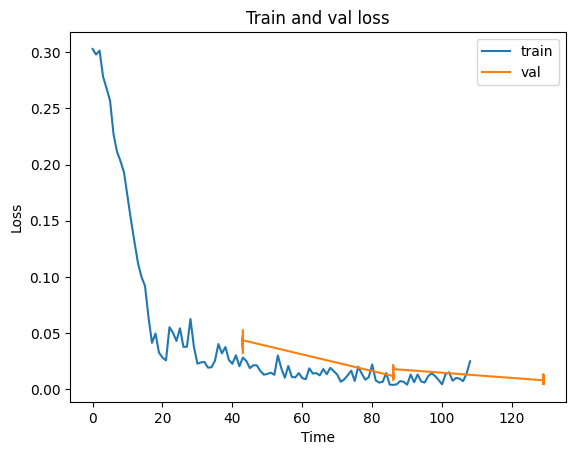

In [ ]:
a,b = zip(*val_returned)
plt.title("Train and val loss")
plt.plot(losses_returned[20:], label='train')
plt.plot(a,b, label='val')
plt.xlabel("Time")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
losses_returned

In [ ]:
train_dataloader = DataLoader(train_data, batch_size=10,
                            shuffle=True, num_workers=5)
for item in train_dataloader:
  print(type(item))
  x = item['image']
  y = item['landmarks']
  print("image: ", x)
  print("landmarks: ", y)
  #print("y_truth: ", y_truth[2])
#next(iter(train_dataloader['x']))

In [ ]:
###Goal: Add two additional layers to compare results with previous model

class ConvNetwork_vector(nn.Module):
  def __init__(self, dataset):
    super(ConvNetwork_vector, self).__init__()
    rescale_factor = 256
    x, y = dataset[0]
    c = 3
    h = rescale_factor
    w = rescale_factor
    #output = 10
###
    self.net = nn.Sequential(
        nn.Conv2d(c, 36, (21, 21)),
        nn.ReLU(),
        # ##nn.Softmax(dim=1),
        nn.Conv2d(36, 64, (21, 21)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1),
        nn.Conv2d(64, 100, (21, 21)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1),
        nn.Conv2d(100, 128, (101, 101)),
        # #nn.Linear(24, output)
        nn.LeakyReLU(0.1),
        nn.Conv2d(128, 64, (21, 21)),
        nn.ReLU(),
        nn.Conv2d(64, 36, (24, 24)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1),
        nn.Conv2d(36, 36, (49, 49)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1)
    )

    self.linear_end = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        ### Primary difference -> returns 4 rather than 2 points
        nn.Linear(10,4)
    )
        ### change shape of x

  def forward(self, x):
    #return self.net(x).squeeze(2).squeeze(2)
    x_1 = self.net(x)
    x_1 = x_1.view(x_1.size(0),-1)
    #print("x_1: ", x_1.size())
    x_2 = self.linear_end(x_1)
    return x_2


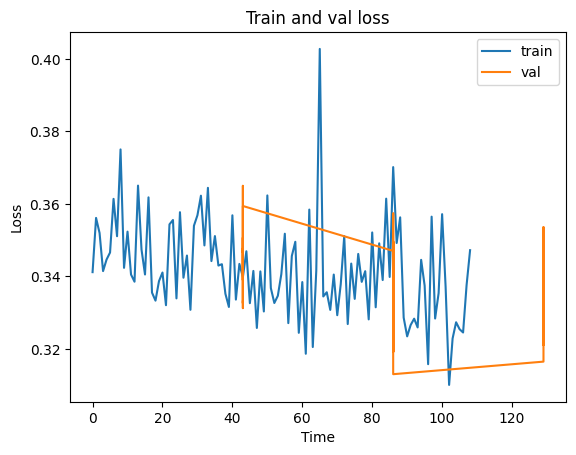

In [ ]:
a,b = zip(*val_returned)
plt.title("Train and val loss")
plt.plot(losses_returned[20:], label='train')
plt.plot(a,b, label='val')
plt.xlabel("Time")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 3 class tests

In [ ]:
landmarks_dir_3class = '/content/drive/MyDrive/side-notchedLandmarks_123.csv'

In [ ]:
train_data3 = ProjPointsDataset(train_landmarks,landmarks_dir_3class, image_directory, transform=transforms.Compose([
                                               Rescale(256),
                                               #RandomCrop(224),
                                               ToTensor()]))
val_data3 = ProjPointsDataset(test_landmarks,landmarks_dir_3class, image_directory, transform=transforms.Compose([
                                               Rescale(256),
                                               #RandomCrop(224),
                                               ToTensor()]))

In [ ]:
###Goal: Add two additional layers to compare results with previous model

class ConvNetwork_vector_3class(nn.Module):
  def __init__(self, dataset):
    super(ConvNetwork_vector_3class, self).__init__()
    rescale_factor = 256
    x, y = dataset[0]
    c = 3
    h = rescale_factor
    w = rescale_factor
    #output = 10
###
    self.net = nn.Sequential(
        nn.Conv2d(c, 36, (11, 11)),
        nn.ReLU(),
        # ##nn.Softmax(dim=1),
        nn.Conv2d(36, 64, (21, 21)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1),
        nn.Conv2d(64, 128, (101, 101)),
        # #nn.Linear(24, output)
        nn.LeakyReLU(0.1),
        nn.Conv2d(128, 64, (101, 101)),
        nn.ReLU(),
        nn.Conv2d(64, 36, (24, 24)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1)
    )

    self.linear_end = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        ### Primary difference -> returns 4 rather than 2 points
        nn.Linear(10,6)
    )
        ### change shape of x

  def forward(self, x):
    #return self.net(x).squeeze(2).squeeze(2)
    x_1 = self.net(x)
    x_1 = x_1.view(x_1.size(0),-1)
    #print("x_1: ", x_1.size())
    x_2 = self.linear_end(x_1)
    return x_2


In [ ]:
import gc

def training_3class():

    gc.collect()
    epochs = 3
    rescale = 256
    lr = .005
    val_every = 10

    batch_size = 10
    device = torch.device('cuda:0')
    model = ConvNetwork_vector_3class(train_data3)
    model = model.cuda()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    objective = nn.MSELoss()

    train_dataloader = DataLoader(train_data3, batch_size=batch_size,
                            shuffle=True, num_workers=5)

    val_dataloader = DataLoader(val_data3, batch_size=batch_size,
                            shuffle=True, num_workers=0)
    losses = []
    validations = []
    #batch = 0

    for epoch in range(epochs):
      loop = tqdm(total=len(train_dataloader), position=0, leave=False)
      for item in train_dataloader:
        ### for garbage collection

        x = item['image']
        x = x.float()
        x = x/rescale
        #print("Type: ", x.dtype)
        y_truth = item['landmarks']
        #print("Type: ",y_truth.dtype)
        y_truth = y_truth.float()
        y_truth = y_truth/rescale


        x, y_truth = x.to(device), y_truth.to(device)
        #print ("Y_truth: ", y_truth)
        optimizer.zero_grad()
        #print(x.size())
        y_hat = model(x)
        y_hat = y_hat.float()
        #print(y_hat)
        ## loss = euclidean_loss(y_hat, y_truth)
        # print(y_hat.size())
        # print(y_truth.size())
        y_truth = y_truth.squeeze(1)
        #y_truth = torch.cat((y_truth), 0)
        #print("y_truth: ", y_truth)

        # print("y_truth: ", y_truth.size())
        # print("batch_size: ", y_truth.size(0))
        curr_batch = y_truth.size(0)
        # print("y_hat: ", y_hat.size())
        y_truth = y_truth.view((curr_batch,6))
        #print("y_truth: ", y_truth.size())

        # print("y_truth: ", y_truth)
        # print("y_hat: ", y_hat)
        loss = objective(y_hat, y_truth)
        loss.backward()
        losses.append(loss.item())

        loop.set_description('epoch:{}, loss:{:.4f}'.format(epoch, loss.item()))
        loop.update(1)

        optimizer.step()

        ##batch += 1
        ###if batch % 40 == 0:

        del loss
        del x, y_truth
        del y_hat
        torch.cuda.empty_cache()
      #### End inner train loop
      ### for every epoch do val collection
      with torch.no_grad():
        for item in val_dataloader:
          x = item['image']
          x = x.float()
          x = x/rescale

          y = item['landmarks']
          y = y.float()
          y = y/rescale
          y = y.squeeze(1)
          curr_val_batch = y.size(0)
          y = y.view((curr_val_batch,6))

          val = np.mean([objective(model(x.cuda()), y.cuda()).item()])
          validations.append((len(losses), val))
          del x,y
          torch.cuda.empty_cache()

    return losses, validations

In [ ]:
losses_returned3, val_returned3 = training_3class()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
  0%|          | 0/43 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is goin

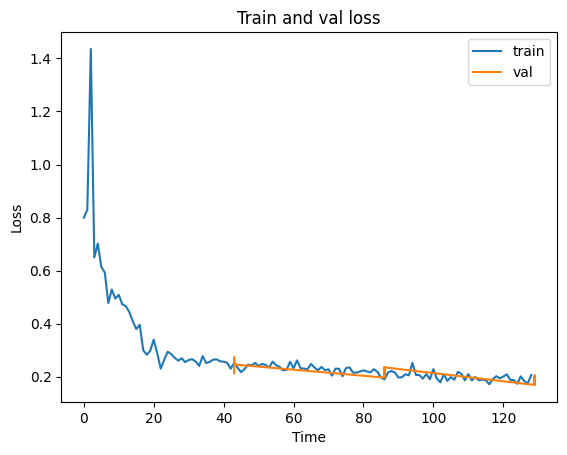

In [ ]:
a,b = zip(*val_returned3)
plt.title("Train and val loss")
plt.plot(losses_returned3, label='train')
plt.plot(a,b, label='val')
plt.xlabel("Time")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 4 class

In [ ]:
landmarks_dir_4class = '/content/drive/MyDrive/side-notchedLandmarks_1234.csv'

In [ ]:
train_data4 = ProjPointsDataset(train_landmarks,landmarks_dir_4class, image_directory, transform=transforms.Compose([
                                               Rescale(256),
                                               #RandomCrop(224),
                                               ToTensor()]))
val_data4 = ProjPointsDataset(test_landmarks,landmarks_dir_4class, image_directory, transform=transforms.Compose([
                                               Rescale(256),
                                               #RandomCrop(224),
                                               ToTensor()]))

In [ ]:
###Goal: Add two additional layers to compare results with previous model

class ConvNetwork_vector_4class(nn.Module):
  def __init__(self, dataset):
    super(ConvNetwork_vector_4class, self).__init__()
    rescale_factor = 256
    x, y = dataset[0]
    c = 3
    h = rescale_factor
    w = rescale_factor
    #output = 10
###
    self.net = nn.Sequential(
        nn.Conv2d(c, 36, (11, 11)),
        nn.ReLU(),
        # ##nn.Softmax(dim=1),
        nn.Conv2d(36, 64, (21, 21)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1),
        nn.Conv2d(64, 128, (101, 101)),
        # #nn.Linear(24, output)
        nn.LeakyReLU(0.1),
        nn.Conv2d(128, 64, (101, 101)),
        nn.ReLU(),
        nn.Conv2d(64, 36, (24, 24)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1)
    )

    self.linear_end = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),

        nn.Linear(10,8)
    )
        ### change shape of x

  def forward(self, x):
    #return self.net(x).squeeze(2).squeeze(2)
    x_1 = self.net(x)
    x_1 = x_1.view(x_1.size(0),-1)
    #print("x_1: ", x_1.size())
    x_2 = self.linear_end(x_1)
    return x_2


In [ ]:
import gc

def training_multi_class(class_num):

    gc.collect()
    epochs = 3
    rescale = 256
    lr = .005
    val_every = 10
    reshape_val = class_num*2

    batch_size = 10
    device = torch.device('cuda:0')
    model = ConvNetwork_vector_4class(train_data4)
    model = model.cuda()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    objective = nn.MSELoss()

    train_dataloader = DataLoader(train_data4, batch_size=batch_size,
                            shuffle=True, num_workers=5)

    val_dataloader = DataLoader(val_data4, batch_size=batch_size,
                            shuffle=True, num_workers=0)
    losses = []
    validations = []
    #batch = 0

    for epoch in range(epochs):
      loop = tqdm(total=len(train_dataloader), position=0, leave=False)
      for item in train_dataloader:
        ### for garbage collection

        x = item['image']
        x = x.float()
        x = x/rescale
        #print("Type: ", x.dtype)
        y_truth = item['landmarks']
        #print("Type: ",y_truth.dtype)
        y_truth = y_truth.float()
        y_truth = y_truth/rescale


        x, y_truth = x.to(device), y_truth.to(device)
        #print ("Y_truth: ", y_truth)
        optimizer.zero_grad()
        #print(x.size())
        y_hat = model(x)
        #y_hat = return_linlay_res(y_init)
        y_hat = y_hat.float()
        #print(y_hat)
        ## loss = euclidean_loss(y_hat, y_truth)
        # print(y_hat.size())
        # print(y_truth.size())
        y_truth = y_truth.squeeze(1)
        #y_truth = torch.cat((y_truth), 0)
        #print("y_truth: ", y_truth)

        # print("y_truth: ", y_truth.size())
        # print("batch_size: ", y_truth.size(0))
        curr_batch = y_truth.size(0)
        # print("y_hat: ", y_hat.size())
        y_truth = y_truth.view((curr_batch, reshape_val))
        #print("y_truth: ", y_truth.size())

        # print("y_truth: ", y_truth.size())
        #print("y_hat: ", y_hat.size())
        loss = objective(y_hat, y_truth)
        loss.backward()
        losses.append(loss.item())

        loop.set_description('epoch:{}, loss:{:.4f}'.format(epoch, loss.item()))
        loop.update(1)

        optimizer.step()

        ##batch += 1
        ###if batch % 40 == 0:

        del loss
        del x, y_truth
        del y_hat
        torch.cuda.empty_cache()
      #### End inner train loop
      ### for every epoch do val collection
      with torch.no_grad():
        for item in val_dataloader:
          x = item['image']
          x = x.float()
          x = x/rescale

          y = item['landmarks']
          y = y.float()
          y = y/rescale
          y = y.squeeze(1)
          curr_val_batch = y.size(0)
          y = y.view((curr_val_batch,reshape_val))

          val = np.mean([objective(model(x.cuda()), y.cuda()).item()])
          validations.append((len(losses), val))
          del x,y
          torch.cuda.empty_cache()

    return losses, validations

In [ ]:
losses_returned_4class, val_returned_4class = training_multi_class(4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
  0%|          | 0/43 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is goin

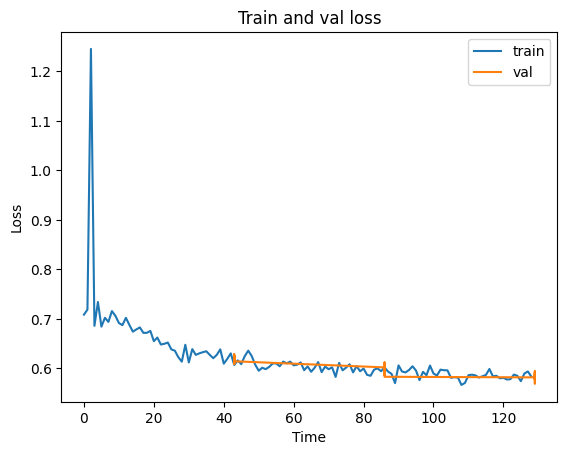

In [ ]:
a,b = zip(*val_returned_4class)
plt.title("Train and val loss")
plt.plot(losses_returned_4class, label='train')
plt.plot(a,b, label='val')
plt.xlabel("Time")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Multi-Head Solution - Comparison

### Multi-head solution - 2 class

In [ ]:
landmarks_dir_2class = '/content/drive/MyDrive/side-notchedLandmarks_1&2.csv'

In [ ]:
train_data2 = ProjPointsDataset(train_landmarks,landmarks_dir_2class, image_directory, transform=transforms.Compose([
                                               Rescale(256),
                                               #RandomCrop(224),
                                               ToTensor()]))
val_data2 = ProjPointsDataset(test_landmarks,landmarks_dir_2class, image_directory, transform=transforms.Compose([
                                               Rescale(256),
                                               #RandomCrop(224),
                                               ToTensor()]))

In [ ]:
###Goal: Add two additional layers to compare results with previous model

class ConvNetwork_vector_2class(nn.Module):
  def __init__(self, dataset):
    super(ConvNetwork_vector_2class, self).__init__()
    rescale_factor = 256
    x, y = dataset[0]
    c = 3
    h = rescale_factor
    w = rescale_factor
    #output = 10
###
    self.net = nn.Sequential(
        nn.Conv2d(c, 36, (11, 11)),
        nn.ReLU(),
        # ##nn.Softmax(dim=1),
        nn.Conv2d(36, 64, (21, 21)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1),
        nn.Conv2d(64, 128, (101, 101)),
        # #nn.Linear(24, output)
        nn.LeakyReLU(0.1),
        nn.Conv2d(128, 64, (101, 101)),
        nn.ReLU(),
        nn.Conv2d(64, 36, (24, 24)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1)
    )

    self.linear_end_1 = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,2)
    )
    self.linear_end_2 = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,2)
    )
        ### change shape of x

  def forward(self, x):
    #return self.net(x).squeeze(2).squeeze(2)
    x_1 = self.net(x)
    x_1 = x_1.view(x_1.size(0),-1)
    #print("x_1: ", x_1.size())
    x_2_1 = self.linear_end_1(x_1)
    x_2_2 = self.linear_end_2(x_1)
    return torch.cat((x_2_1,x_2_2),1)


### Training Multi Class main function

In [ ]:
import gc

def training_multi_class(class_num, input_model, train_data_input, val_data_input):

    gc.collect()
    epochs = 3
    rescale = 256
    lr = .005
    val_every = 10
    reshape_val = class_num*2

    batch_size = 10
    device = torch.device('cuda:0')
    model = input_model
    model = model.cuda()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    objective = nn.MSELoss()

    train_dataloader = DataLoader(train_data_input, batch_size=batch_size,
                            shuffle=True, num_workers=5)

    val_dataloader = DataLoader(val_data_input, batch_size=batch_size,
                            shuffle=True, num_workers=0)
    losses = []
    validations = []
    val_accuracies = []
    accuracies = []
    #batch = 0

    for epoch in range(epochs):
      loop = tqdm(total=len(train_dataloader), position=0, leave=False)
      for item in train_dataloader:
        ### for garbage collection

        x = item['image']
        x = x.float()
        x = x/rescale
        #print("Type: ", x.dtype)
        y_truth = item['landmarks']
        #print("Type: ",y_truth.dtype)
        y_truth = y_truth.float()
        y_truth = y_truth/rescale


        x, y_truth = x.to(device), y_truth.to(device)
        #print ("Y_truth: ", y_truth)
        optimizer.zero_grad()
        #print(x.size())
        y_hat = model(x)
        #y_hat = return_linlay_res(y_init)
        y_hat = y_hat.float()
        #print(y_hat)
        ## loss = euclidean_loss(y_hat, y_truth)
        # print(y_hat.size())
        # print(y_truth.size())
        y_truth = y_truth.squeeze(1)
        #y_truth = torch.cat((y_truth), 0)
        # print("y_truth: ", y_truth.size())

        # print("y_truth: ", y_truth.size())
        # print("batch_size: ", y_truth.size(0))
        curr_batch = y_truth.size(0)
        #print("y_hat: ", y_hat.size())
        y_truth = y_truth.view((curr_batch, reshape_val))

        # print("y_truth: ", y_truth.size())
        # print("y_hat: ", y_hat.size())
        loss = objective(y_hat, y_truth)
        loss.backward()
        losses.append(loss.item())

        output_accuracy = accuracy(y_hat, y_truth)
        accuracies.append(output_accuracy.item())

        loop.set_description('epoch:{}, loss:{:.4f}'.format(epoch, loss.item()))
        loop.update(1)

        optimizer.step()

        ##batch += 1
        ###if batch % 40 == 0:

        del loss
        del x, y_truth
        del y_hat
        torch.cuda.empty_cache()
      #### End inner train loop
      ### for every epoch do val collection
      with torch.no_grad():
        for item in val_dataloader:
          x = item['image']
          x = x.float()
          x = x/rescale

          y = item['landmarks']
          y = y.float()
          y = y/rescale
          y = y.squeeze(1)
          curr_val_batch = y.size(0)
          y = y.view((curr_val_batch,reshape_val))

          val = np.mean([objective(model(x.cuda()), y.cuda()).item()])
          validations.append((len(losses), val))

          val_acc = np.mean([accuracy(model(x.cuda()), y.cuda()).item()])
          val_accuracies.append((len(accuracies), val_acc))
          del x,y
          torch.cuda.empty_cache()

    return losses, validations, accuracies, val_accuracies

In [ ]:
losses_returned_2class, val_returned_2class = training_multi_class(2, ConvNetwork_vector_2class(train_data2), train_data2, val_data2)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
  0%|          | 0/43 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is goin

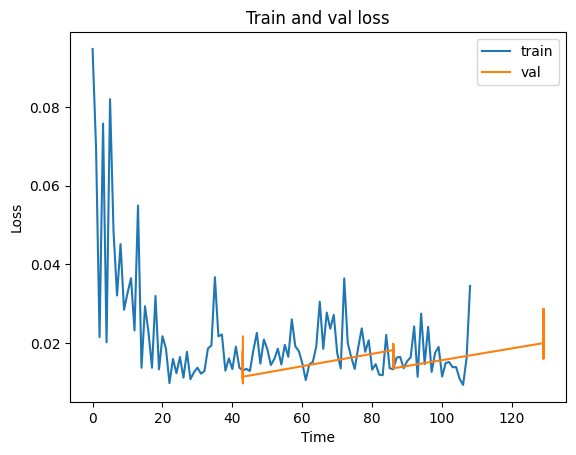

In [ ]:
a,b = zip(*val_returned_2class)
plt.title("Train and val loss")
plt.plot(losses_returned_2class[20:], label='train')
plt.plot(a,b, label='val')
plt.xlabel("Time")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 3 class

In [ ]:
landmarks_dir_3class = '/content/drive/MyDrive/side-notchedLandmarks_123.csv'

train_data3 = ProjPointsDataset(train_landmarks,landmarks_dir_3class, image_directory, transform=transforms.Compose([
                                               Rescale(256),
                                               #RandomCrop(224),
                                               ToTensor()]))
val_data3 = ProjPointsDataset(test_landmarks,landmarks_dir_3class, image_directory, transform=transforms.Compose([
                                               Rescale(256),
                                               #RandomCrop(224),
                                               ToTensor()]))

In [ ]:
###Goal: Add two additional layers to compare results with previous model

class ConvNetwork_vector_3class(nn.Module):
  def __init__(self, dataset):
    super(ConvNetwork_vector_3class, self).__init__()
    rescale_factor = 256
    x, y = dataset[0]
    c = 3
    h = rescale_factor
    w = rescale_factor
    #output = 10
###
    self.net = nn.Sequential(
        nn.Conv2d(c, 36, (11, 11)),
        nn.ReLU(),
        # ##nn.Softmax(dim=1),
        nn.Conv2d(36, 64, (21, 21)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1),
        nn.Conv2d(64, 128, (101, 101)),
        # #nn.Linear(24, output)
        nn.LeakyReLU(0.1),
        nn.Conv2d(128, 64, (101, 101)),
        nn.ReLU(),
        nn.Conv2d(64, 36, (24, 24)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1)
    )

    self.linear_end_1 = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,2)
    )
    self.linear_end_2 = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,2)
    )
    self.linear_end_3 = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,2)
    )
        ### change shape of x

  def forward(self, x):
    #return self.net(x).squeeze(2).squeeze(2)
    x_1 = self.net(x)
    x_1 = x_1.view(x_1.size(0),-1)
    #print("x_1: ", x_1.size())
    x_2_1 = self.linear_end_1(x_1)
    x_2_2 = self.linear_end_2(x_1)
    x_2_3 = self.linear_end_3(x_1)
    return torch.cat((x_2_1,x_2_2,x_2_3),1)


In [ ]:
train_data3[0]

In [ ]:
losses_returned_3class, val_returned_3class = training_multi_class(3, ConvNetwork_vector_3class(train_data3), train_data3, val_data3)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
  0%|          | 0/43 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is goin

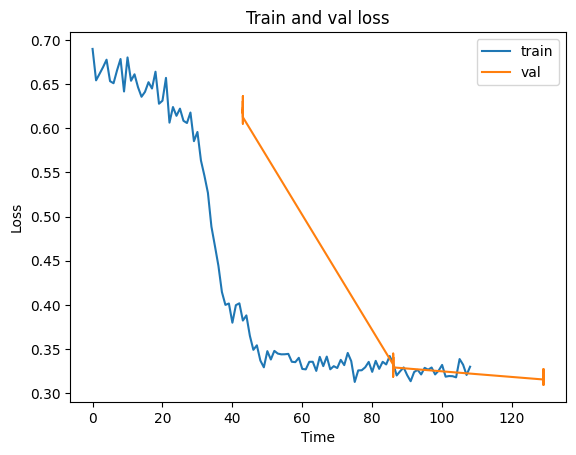

In [ ]:
a,b = zip(*val_returned_3class)
plt.title("Train and val loss")
plt.plot(losses_returned_3class[20:], label='train')
plt.plot(a,b, label='val')
plt.xlabel("Time")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 4 class

In [ ]:
landmarks_dir_4class = '/content/drive/MyDrive/side-notchedLandmarks_1234.csv'

train_data4 = ProjPointsDataset(train_landmarks,landmarks_dir_4class, image_directory, transform=transforms.Compose([
                                               Rescale(256),
                                               #RandomCrop(224),
                                               ToTensor()]))
val_data4 = ProjPointsDataset(test_landmarks,landmarks_dir_4class, image_directory, transform=transforms.Compose([
                                               Rescale(256),
                                               #RandomCrop(224),
                                               ToTensor()]))

In [ ]:
###Goal: Add two additional layers to compare results with previous model

class ConvNetwork_vector_4class(nn.Module):
  def __init__(self, dataset):
    super(ConvNetwork_vector_4class, self).__init__()
    rescale_factor = 256
    x, y = dataset[0]
    c = 3
    h = rescale_factor
    w = rescale_factor
    #output = 10
###
    self.net = nn.Sequential(
        nn.Conv2d(c, 36, (11, 11)),
        nn.ReLU(),
        # ##nn.Softmax(dim=1),
        nn.Conv2d(36, 64, (21, 21)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1),
        nn.Conv2d(64, 128, (101, 101)),
        # #nn.Linear(24, output)
        nn.LeakyReLU(0.1),
        nn.Conv2d(128, 64, (101, 101)),
        nn.ReLU(),
        nn.Conv2d(64, 36, (24, 24)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1)
    )

    self.linear_end_1 = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,2)
    )
    self.linear_end_2 = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,2)
    )
    self.linear_end_3 = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,2)
    )
    self.linear_end_4 = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,2)
    )
        ### change shape of x

  def forward(self, x):
    #return self.net(x).squeeze(2).squeeze(2)
    x_1 = self.net(x)
    x_1 = x_1.view(x_1.size(0),-1)
    #print("x_1: ", x_1.size())
    x_2_1 = self.linear_end_1(x_1)
    x_2_2 = self.linear_end_2(x_1)
    x_2_3 = self.linear_end_3(x_1)
    x_2_4 = self.linear_end_4(x_1)
    return torch.cat((x_2_1,x_2_2,x_2_3,x_2_4),1)


In [ ]:
losses_returned_4class, val_returned_4class = training_multi_class(4, ConvNetwork_vector_4class(train_data4), train_data4, val_data4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
  0%|          | 0/43 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
epoch:0, loss:0.0221: 100%|██████████| 43/43 [17:32<00:00, 19.93s/it]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will like

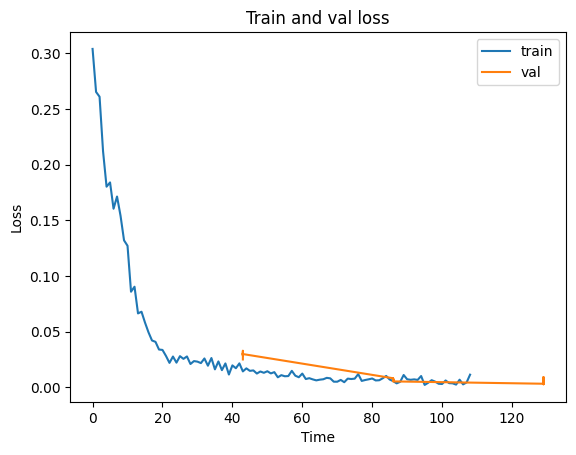

In [ ]:
a,b = zip(*val_returned_4class)
plt.title("Train and val loss")
plt.plot(losses_returned_4class[20:], label='train')
plt.plot(a,b, label='val')
plt.xlabel("Time")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 5 class

In [ ]:
landmarks_dir_5class = '/content/drive/MyDrive/side-notchedLandmarks_12345.csv'

train_data5 = ProjPointsDataset(train_landmarks,landmarks_dir_5class, image_directory, transform=transforms.Compose([
                                               Rescale(256),
                                               #RandomCrop(224),
                                               ToTensor()]))
val_data5 = ProjPointsDataset(test_landmarks,landmarks_dir_5class, image_directory, transform=transforms.Compose([
                                               Rescale(256),
                                               #RandomCrop(224),
                                               ToTensor()]))

In [ ]:
###Goal: Add two additional layers to compare results with previous model

class ConvNetwork_vector_5class(nn.Module):
  def __init__(self, dataset):
    super(ConvNetwork_vector_5class, self).__init__()
    rescale_factor = 256
    x, y = dataset[0]
    c = 3
    h = rescale_factor
    w = rescale_factor
    #output = 10
###
    self.net = nn.Sequential(
        nn.Conv2d(c, 36, (11, 11)),
        nn.ReLU(),
        # ##nn.Softmax(dim=1),
        nn.Conv2d(36, 64, (21, 21)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1),
        nn.Conv2d(64, 128, (101, 101)),
        # #nn.Linear(24, output)
        nn.LeakyReLU(0.1),
        nn.Conv2d(128, 64, (101, 101)),
        nn.ReLU(),
        nn.Conv2d(64, 36, (24, 24)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1)
    )

    self.linear_end_1 = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,2)
    )
    self.linear_end_2 = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,2)
    )
    self.linear_end_3 = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,2)
    )
    self.linear_end_4 = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,2)
    )
    self.linear_end_5 = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,2)
    )
        ### change shape of x

  def forward(self, x):
    #return self.net(x).squeeze(2).squeeze(2)
    x_1 = self.net(x)
    x_1 = x_1.view(x_1.size(0),-1)
    #print("x_1: ", x_1.size())
    x_2_1 = self.linear_end_1(x_1)
    x_2_2 = self.linear_end_2(x_1)
    x_2_3 = self.linear_end_3(x_1)
    x_2_4 = self.linear_end_4(x_1)
    x_2_5 = self.linear_end_5(x_1)
    return torch.cat((x_2_1,x_2_2,x_2_3,x_2_4,x_2_5),1)


In [ ]:
losses_returned_5class, val_returned_5class = training_multi_class(5, ConvNetwork_vector_5class(train_data5), train_data5, val_data5)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
  0%|          | 0/43 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is goin

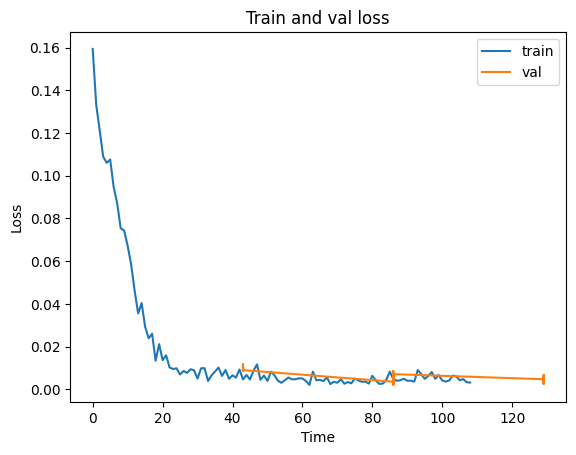

In [ ]:
a,b = zip(*val_returned_5class)
plt.title("Train and val loss")
plt.plot(losses_returned_5class[20:], label='train')
plt.plot(a,b, label='val')
plt.xlabel("Time")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 6 classes

In [ ]:
landmarks_dir_6class = '/content/drive/MyDrive/side-notchedLandmarks_123456.csv'

train_data6 = ProjPointsDataset(train_landmarks,landmarks_dir_6class, image_directory, transform=transforms.Compose([
                                               Rescale(256),
                                               #RandomCrop(224),
                                               ToTensor()]))
val_data6 = ProjPointsDataset(test_landmarks,landmarks_dir_6class, image_directory, transform=transforms.Compose([
                                               Rescale(256),
                                               #RandomCrop(224),
                                               ToTensor()]))

In [ ]:
def accuracy(predicted, actual):
  threshhold = .2
  diff = torch.sub(actual,predicted,alpha=1,out=None)
  #print(diff)

  a = torch.norm(diff, p=float('inf'),dim=1)
  #print("a: ", a)
  accur_score = a < threshhold
  #print(accur_score)
  return torch.mean(accur_score.float())


In [ ]:
###Goal: Add two additional layers to compare results with previous model

class ConvNetwork_vector_6class(nn.Module):
  def __init__(self, dataset):
    super(ConvNetwork_vector_6class, self).__init__()
    rescale_factor = 256
    x, y = dataset[0]
    c = 3
    h = rescale_factor
    w = rescale_factor
    #output = 10
###
    self.net = nn.Sequential(
        nn.Conv2d(c, 36, (11, 11)),
        nn.ReLU(),
        # ##nn.Softmax(dim=1),
        nn.Conv2d(36, 64, (21, 21)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1),
        nn.Conv2d(64, 128, (101, 101)),
        # #nn.Linear(24, output)
        nn.LeakyReLU(0.1),
        nn.Conv2d(128, 64, (101, 101)),
        nn.ReLU(),
        nn.Conv2d(64, 36, (24, 24)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1)
    )

    self.linear_end_1 = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,2)
    )
    self.linear_end_2 = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,2)
    )
    self.linear_end_3 = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,2)
    )
    self.linear_end_4 = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,2)
    )
    self.linear_end_5 = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,2)
    )
    self.linear_end_6 = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,2)
    )
        ### change shape of x

  def forward(self, x):
    #return self.net(x).squeeze(2).squeeze(2)
    x_1 = self.net(x)
    x_1 = x_1.view(x_1.size(0),-1)
    #print("x_1: ", x_1.size())
    x_2_1 = self.linear_end_1(x_1)
    x_2_2 = self.linear_end_2(x_1)
    x_2_3 = self.linear_end_3(x_1)
    x_2_4 = self.linear_end_4(x_1)
    x_2_5 = self.linear_end_5(x_1)
    x_2_6 = self.linear_end_6(x_1)
    return torch.cat((x_2_1,x_2_2,x_2_3,x_2_4,x_2_5,x_2_6),1)


In [ ]:
import gc

def training_multi_class(class_num, input_model, train_data_input, val_data_input):

    gc.collect()
    epochs = 3
    rescale = 256
    lr = .05
    val_every = 10
    reshape_val = class_num*2

    batch_size = 10
    device = torch.device('cuda:0')
    model = input_model
    model = model.cuda()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    objective = nn.MSELoss()

    train_dataloader = DataLoader(train_data_input, batch_size=batch_size,
                            shuffle=True, num_workers=5)

    val_dataloader = DataLoader(val_data_input, batch_size=batch_size,
                            shuffle=True, num_workers=0)
    losses = []
    validations = []
    val_accuracies = []
    accuracies = []
    #batch = 0

    for epoch in range(epochs):
      loop = tqdm(total=len(train_dataloader), position=0, leave=False)
      for item in train_dataloader:
        ### for garbage collection

        x = item['image']
        x = x.float()
        x = x/rescale
        #print("Type: ", x.dtype)
        y_truth = item['landmarks']
        #print("Type: ",y_truth.dtype)
        y_truth = y_truth.float()
        y_truth = y_truth/rescale


        x, y_truth = x.to(device), y_truth.to(device)
        #print ("Y_truth: ", y_truth)
        optimizer.zero_grad()
        #print(x.size())
        y_hat = model(x)
        #y_hat = return_linlay_res(y_init)
        y_hat = y_hat.float()
        #print(y_hat)
        ## loss = euclidean_loss(y_hat, y_truth)
        # print(y_hat.size())
        # print(y_truth.size())
        y_truth = y_truth.squeeze(1)
        #y_truth = torch.cat((y_truth), 0)
        # print("y_truth: ", y_truth.size())

        # print("y_truth: ", y_truth.size())
        # print("batch_size: ", y_truth.size(0))
        curr_batch = y_truth.size(0)
        #print("y_hat: ", y_hat.size())
        y_truth = y_truth.view((curr_batch, reshape_val))

        # print("y_truth: ", y_truth.size())
        # print("y_hat: ", y_hat.size())
        loss = objective(y_hat, y_truth)
        loss.backward()
        losses.append(loss.item())

        output_accuracy = accuracy(y_hat, y_truth)
        accuracies.append(output_accuracy.item())

        loop.set_description('epoch:{}, loss:{:.4f}, accuracy:{:.3f}'.format(epoch, loss.item(), output_accuracy.item()))
        loop.update(1)

        optimizer.step()

        ##batch += 1
        ###if batch % 40 == 0:

        del loss
        del x, y_truth
        del y_hat
        torch.cuda.empty_cache()
      #### End inner train loop
      ### for every epoch do val collection
      with torch.no_grad():
        vals = []
        acc_vals = []
        for item in val_dataloader:
          x = item['image']
          x = x.float()
          x = x/rescale

          y = item['landmarks']
          y = y.float()
          y = y/rescale
          y = y.squeeze(1)
          curr_val_batch = y.size(0)
          y = y.view((curr_val_batch,reshape_val))

          val = np.mean([objective(model(x.cuda()), y.cuda()).item()])
          vals.append(val)

          val_acc = np.mean([accuracy(model(x.cuda()), y.cuda()).item()])
          acc_vals.append(val_acc)
          del x,y
          torch.cuda.empty_cache()
        validations.append((len(losses),  np.mean(vals)))

        val_accuracies.append((len(accuracies), np.mean(acc_vals)))

    return losses, validations, accuracies, val_accuracies

In [ ]:
losses_returned_6class, val_returned_6class, acc_6class, val_acc_6class = training_multi_class(6, ConvNetwork_vector_6class(train_data6), train_data6, val_data6)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
  0%|          | 0/43 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is goin

In [ ]:
print("Losses: ",losses_returned_6class)
print("Val losses: ", val_returned_6class)
print("Accuracies: ", acc_6class)
print("Val Accuracies: ", val_acc_6class)

Losses:  [0.7591296434402466, 0.7349528670310974, 1.7511228322982788, 0.7197149395942688, 0.7453314661979675, 0.6658123135566711, 0.578694224357605, 0.5705122351646423, 0.48670926690101624, 0.5489336848258972, 0.47149747610092163, 0.489330917596817, 0.3889765739440918, 0.44574353098869324, 0.36630985140800476, 0.34405937790870667, 0.37101542949676514, 0.34432223439216614, 0.30052128434181213, 0.33385905623435974, 0.27151694893836975, 0.27688154578208923, 0.269064724445343, 0.2405349165201187, 0.23830640316009521, 0.21295692026615143, 0.19675113260746002, 0.18747052550315857, 0.1761217564344406, 0.17348770797252655, 0.1417902410030365, 0.12311909347772598, 0.12101296335458755, 0.11031462997198105, 0.10074666887521744, 0.07647266238927841, 0.06903848797082901, 0.05987510457634926, 0.05753922834992409, 0.050388313829898834, 0.038872867822647095, 0.03174964338541031, 0.04857487604022026, 0.01965375430881977, 0.021113771945238113, 0.01613752357661724, 0.016128674149513245, 0.007137142121791

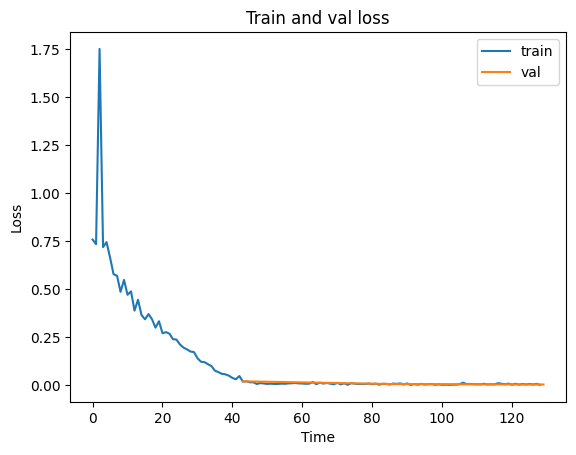

In [ ]:
a,b = zip(*val_returned_6class)
plt.title("Train and val loss")
plt.plot(losses_returned_6class, label='train')
plt.plot(a,b, label='val')
plt.xlabel("Time")
plt.ylabel("Loss")
plt.legend()
plt.show()

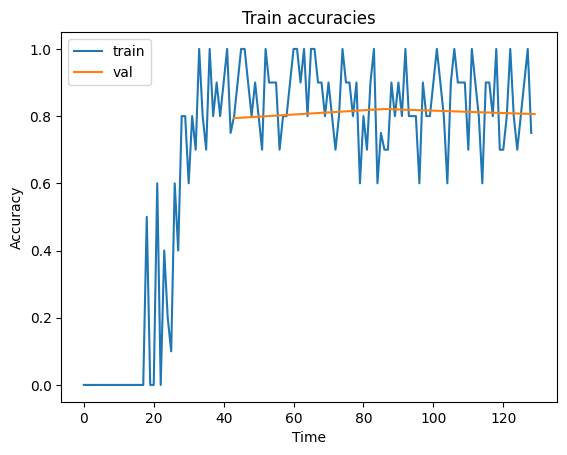

In [ ]:
a,b = zip(*val_acc_6class)
plt.title("Train accuracies")
plt.plot((acc_6class), label='train')
plt.plot(a,b, label='val')
plt.xlabel("Time")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
final_model =  ConvNetwork_vector_6class(train_data6)

total_params = sum(p.numel() for p in final_model.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 169545440


### Class 1 and 6 test

In [ ]:
landmarks_dir_16class = '/content/drive/MyDrive/side-notchedLandmarks_16.csv'

In [ ]:
train_data_16 = ProjPointsDataset(train_landmarks,landmarks_dir_16class, image_directory, transform=transforms.Compose([
                                               Rescale(256),
                                               #RandomCrop(224),
                                               ToTensor()]))
val_data_16 = ProjPointsDataset(test_landmarks,landmarks_dir_16class, image_directory, transform=transforms.Compose([
                                               Rescale(256),
                                               #RandomCrop(224),
                                               ToTensor()]))

In [ ]:
###Goal: Add two additional layers to compare results with previous model

class ConvNetwork_vector_2class(nn.Module):
  def __init__(self, dataset):
    super(ConvNetwork_vector_2class, self).__init__()
    rescale_factor = 256
    x, y = dataset[0]
    c = 3
    h = rescale_factor
    w = rescale_factor
    #output = 10
###
    self.net = nn.Sequential(
        nn.Conv2d(c, 36, (11, 11)),
        nn.ReLU(),
        # ##nn.Softmax(dim=1),
        nn.Conv2d(36, 64, (21, 21)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1),
        nn.Conv2d(64, 128, (101, 101)),
        # #nn.Linear(24, output)
        nn.LeakyReLU(0.1),
        nn.Conv2d(128, 64, (101, 101)),
        nn.ReLU(),
        nn.Conv2d(64, 36, (24, 24)),
        nn.ReLU(),
        nn.MaxPool2d(2, stride =  1)
    )

    self.linear_end_1 = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,2)
    )
    self.linear_end_2 = nn.Sequential(
        nn.Linear(36, 100),
        nn.ReLU(),
        nn.Linear(100,50),
        nn.ReLU(),
        nn.Linear(50,10),
        nn.ReLU(),
        nn.Linear(10,2)
    )
        ### change shape of x

  def forward(self, x):
    #return self.net(x).squeeze(2).squeeze(2)
    x_1 = self.net(x)
    x_1 = x_1.view(x_1.size(0),-1)
    #print("x_1: ", x_1.size())
    x_2_1 = self.linear_end_1(x_1)
    x_2_2 = self.linear_end_2(x_1)
    return torch.cat((x_2_1,x_2_2),1)


In [ ]:
losses_returned_16class, val_returned_16class = training_multi_class(2, ConvNetwork_vector_2class(train_data_16), train_data_16, val_data_16)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
  0%|          | 0/43 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is goin

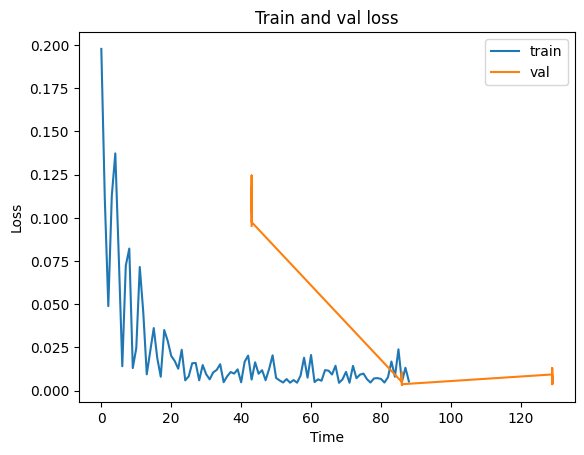

In [ ]:
a,b = zip(*val_returned_16class)
plt.title("Train and val loss")
plt.plot(losses_returned_16class[40:], label='train')
plt.plot(a,b, label='val')
plt.xlabel("Time")
plt.ylabel("Loss")
plt.legend()
plt.show()